In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Read sample data
df_raw_df_channels = pd.read_csv('../../RawData/_raw_df_channels.tsv.gz', sep='\t', compression='gzip')
df_raw_df_timeseries = pd.read_csv('../../RawData/_raw_df_timeseries.tsv.gz', sep='\t', compression='gzip')
#df_raw_yt_metadata_sample = pd.read_csv('../SampleData/anchor_raw_yt_metadata.csv')
#df_num_comments_sample = pd.read_csv('../SampleData/anchor_num_comments.csv')
#df_youtube_comments_sample = pd.read_csv('../SampleData/anchor_youtube_comments.csv')

### Initial Data Exploration

##### df_raw_yt_metadata_sample

In [ ]:
#df_raw_yt_metadata_sample.info()
df_raw_yt_metadata_sample.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,News & Politics,UCzF4Ryn8TKn64md77gS5Q5Q,2019-11-04 21:08:28.112190,Check out these stories from Up Late on July 3...,0.0,8GXrVeMvnSc,101,1.0,"local,nation-world,uplate,news","Shopping spree, missile launcher at airport, c...",2019-07-30 00:00:00,81
1,Gaming,UCxAO5YFqDZtgLnbPFusVbpw,2019-11-08 05:02:02.833895,-\n➡ Twitter: https://mobile.twitter.com/DopeB...,4.0,GCbpVAkBKQU,735,51.0,YouTube Editor,GTA 5 Online - EXTREME SKY PARKOUR #29,2016-12-28 00:00:00,1245
2,Film & Animation,UCzAGlJSAVyj_lWer83EwCBA,2019-10-31 16:00:57.316487,This is the sims 4 parody of Selena Gomez new ...,8.0,8D4k0jb3c4I,233,267.0,"Selena Gomez,Parody,Selena Gomez Sims,TheHeart...",Selena Gomez - The Heart Wants What It Wants (...,2014-11-29 00:00:00,13332
3,Education,UCxxJ9U-7GrTRbQj0O_g_j5A,2019-11-02 10:14:48.747848,NaN,0.0,IVCGDt4Mil4,957,0.0,Rotkaeppchen,Rotkaeppchen Fragment,2012-08-18 00:00:00,384
4,News & Politics,UCyD8ZyTQvZn9dnhyNnmjtAA,2019-10-31 02:49:05.349424,Watch Kanam Movie Team Special Interview\n\nPl...,0.0,fgmrnwhEoNY,1193,43.0,"Kanam Movie Team Special Interview,Kanam Movie...",Kanam Movie Team Special Interview | Sai Palla...,2018-04-27 00:00:00,6991


In [ ]:
df_raw_yt_metadata_sample['channel_id'].value_counts()

channel_id
UCzoPb9sKVAHd-pIzv9RGGRA    1004
UCzlzd-W9QnHySOZ4fckELKA     809
UCytSP0M0Jdnw6qIy3Y-nTig     752
UCy_wfdc0rV7fi_YLhmKQ9gw     741
UCybF_bgvjVTAPIm8HT-TNdQ     693
                            ... 
UCxl2BGCsmu3lx7Fzchih2aQ       1
UCyhtzM0loE5rS_RaF8E5r1g       1
UCzoKpIaA0Xax6SxFhUUogEg       1
UCztIh384xM85AojZaW82RAA       1
UCxUkHoYYCkxZBxNCG3-Nf8g       1
Name: count, Length: 6857, dtype: int64

In [ ]:
df_raw_yt_metadata_sample[df_raw_yt_metadata_sample['channel_id'] == 'UCzlzd-W9QnHySOZ4fckELKA']

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
446,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 17:49:06.534423,Provided to YouTube by Bookwire\n\nKapitel 203...,0.0,b2bOJjqFIo0,212,0.0,"A.,L.,Kahnau,Juli,im,Winter,Kapitel,203",Kapitel 203 - Juli im Winter,2019-05-09 00:00:00,3
765,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 18:02:41.888172,Provided to YouTube by The Orchard Enterprises...,0.0,fO-aOk6jErQ,204,0.0,"Boom,the,Bass,Night,Music-Disco,Daddy,Cool",Daddy Cool,2017-02-18 00:00:00,0
965,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 18:01:00.874339,Provided to YouTube by Xelon Entertainment\n\n...,0.0,MKFYS2tamXI,232,0.0,"Astor,Luiz,Eça,The,No,Bossa,Nova,Album,Meditação",Meditação,2015-02-13 00:00:00,1
1057,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 17:56:28.008290,Provided to YouTube by National Digital Aggreg...,0.0,saiRjIOKVZo,372,2.0,"Стас Намин и Группа Цветы,Распахни своё окно,С...",Снежная баллада/Ноябрьский снег,2018-03-12 00:00:00,26
1157,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 17:46:44.773382,Provided to YouTube by Digisay Music\n\nGamd A...,0.0,laDu4Nid468,373,2.0,"Hamo,Bika,ML,Music,compilation,Gamd,Albk",Gamd Albk,2019-08-16 00:00:00,36
...,...,...,...,...,...,...,...,...,...,...,...,...
99459,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 17:55:17.720540,Provided to YouTube by Believe SAS\n\nCoracao ...,0.0,xXH6ocBhtxA,310,0.0,"Beleza Tunes Midnight Lounge,Vol. 1 Coracao Va...",Coracao Vagabundo (Original Mix),2018-06-15 00:00:00,0
99473,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 17:50:04.792861,Provided to YouTube by Recording Industry Asso...,0.0,dKLgv5CQ_M4,271,0.0,"김미령,여자이야기,1집,세월의,바람,사랑의,꽃(Classic,Ver.)",사랑의 꽃 (Classic Ver.) (Instrumental),2019-02-17 00:00:00,3
99505,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 18:01:24.902783,Provided to YouTube by The Orchard Enterprises...,0.0,NlrC47T6sGU,161,0.0,"The Swedish Modern Jazz Group European Jazz,Vo...",Cotton Tail,2014-12-17 00:00:00,2
99613,Music,UCzlzd-W9QnHySOZ4fckELKA,2019-11-07 17:56:01.736219,Moonraker (Starborn Extended Mix) · Disco Drax...,0.0,_2Y5LYNBBe4,388,0.0,"Disco,Drax,Tribute,to,James,Bond,Soundtrack,Hi...",Moonraker (Starborn Extended Mix),2018-05-24 00:00:00,123


In [ ]:
# Add parameter: days between upload and crawl
df_raw_yt_metadata_sample['upload_date'] = pd.to_datetime(df_raw_yt_metadata_sample['upload_date'], errors='coerce')
df_raw_yt_metadata_sample['crawl_date'] = pd.to_datetime(df_raw_yt_metadata_sample['crawl_date'], errors='coerce')

df_raw_yt_metadata_sample['days_to_crawl'] = (df_raw_yt_metadata_sample['crawl_date'] - df_raw_yt_metadata_sample['upload_date']).dt.days

# Create ratios per days_to_crawl (avoid divide-by-zero/non-positive)
days = df_raw_yt_metadata_sample['days_to_crawl']
df_raw_yt_metadata_sample['likes_per_days_to_crawl'] = np.where(days > 0, df_raw_yt_metadata_sample['like_count'] / days, np.nan)
df_raw_yt_metadata_sample['dislikes_per_days_to_crawl'] = np.where(days > 0, df_raw_yt_metadata_sample['dislike_count'] / days, np.nan)
df_raw_yt_metadata_sample['views_per_days_to_crawl'] = np.where(days > 0, df_raw_yt_metadata_sample['view_count'] / days, np.nan)

df_raw_yt_metadata_sample.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,days_to_crawl,likes_per_days_to_crawl,dislikes_per_days_to_crawl,views_per_days_to_crawl
0,News & Politics,UCzF4Ryn8TKn64md77gS5Q5Q,2019-11-04 21:08:28.112190,Check out these stories from Up Late on July 3...,0.0,8GXrVeMvnSc,101,1.0,"local,nation-world,uplate,news","Shopping spree, missile launcher at airport, c...",2019-07-30,81,97.0,0.010309,0.000000,0.835052
1,Gaming,UCxAO5YFqDZtgLnbPFusVbpw,2019-11-08 05:02:02.833895,-\n➡ Twitter: https://mobile.twitter.com/DopeB...,4.0,GCbpVAkBKQU,735,51.0,YouTube Editor,GTA 5 Online - EXTREME SKY PARKOUR #29,2016-12-28,1245,1045.0,0.048804,0.003828,1.191388
2,Film & Animation,UCzAGlJSAVyj_lWer83EwCBA,2019-10-31 16:00:57.316487,This is the sims 4 parody of Selena Gomez new ...,8.0,8D4k0jb3c4I,233,267.0,"Selena Gomez,Parody,Selena Gomez Sims,TheHeart...",Selena Gomez - The Heart Wants What It Wants (...,2014-11-29,13332,1797.0,0.148581,0.004452,7.419032
3,Education,UCxxJ9U-7GrTRbQj0O_g_j5A,2019-11-02 10:14:48.747848,NaN,0.0,IVCGDt4Mil4,957,0.0,Rotkaeppchen,Rotkaeppchen Fragment,2012-08-18,384,2632.0,0.000000,0.000000,0.145897
4,News & Politics,UCyD8ZyTQvZn9dnhyNnmjtAA,2019-10-31 02:49:05.349424,Watch Kanam Movie Team Special Interview\n\nPl...,0.0,fgmrnwhEoNY,1193,43.0,"Kanam Movie Team Special Interview,Kanam Movie...",Kanam Movie Team Special Interview | Sai Palla...,2018-04-27,6991,552.0,0.077899,0.000000,12.664855


In [ ]:
df_raw_yt_metadata_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   categories                  100000 non-null  object        
 1   channel_id                  100000 non-null  object        
 2   crawl_date                  99999 non-null   datetime64[ns]
 3   description                 95265 non-null   object        
 4   dislike_count               97509 non-null   float64       
 5   display_id                  100000 non-null  object        
 6   duration                    100000 non-null  int64         
 7   like_count                  97509 non-null   float64       
 8   tags                        89810 non-null   object        
 9   title                       100000 non-null  object        
 10  upload_date                 100000 non-null  datetime64[ns]
 11  view_count                  100000 non-n

##### df_raw_df_channels

In [5]:
df_raw_df_channels.info()

# This set doesn't have duplicate channels
channel_counts = df_raw_df_channels['channel'].value_counts()
print(len(channel_counts[channel_counts > 1]))

df_raw_df_channels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156977 entries, 0 to 156976
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category_cc         156846 non-null  object 
 1   join_date           156976 non-null  object 
 2   channel             156977 non-null  object 
 3   name_cc             156965 non-null  object 
 4   subscribers_cc      156977 non-null  int64  
 5   videos_cc           156977 non-null  int64  
 6   subscriber_rank_sb  153330 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.4+ MB
0


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
0,Film and Animation,2017-05-21,UCBJuEqXfXTdcPSbGO9qqn1g,MagnusNation,65100,28,231223.0
1,Entertainment,2011-12-13,UCkNW9Q1VR_aeZ6uht83jJVQ,Mago Dario Animazion...,60200,48,238538.0
2,Music,2008-03-17,UCXhkGgooXHDNwgJXmoTSN7g,Mago Merlino,14800,838,707828.0
3,Entertainment,2014-10-19,UCvZGsuvKlYOGiZTsxwJNS5Q,MAGO TOMÁS,26200,31,424550.0
4,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,422966.0


In [6]:
df_raw_df_channels[df_raw_df_channels['channel'] == 'UCxJWPpPED-J24znoKyKZYjg']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
4,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,422966.0


##### df_raw_df_timeseries

In [7]:
df_raw_df_timeseries.info()
#df_raw_df_timeseries.head()
df_raw_df_timeseries['channel'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21553648 entries, 0 to 21553647
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   channel       object 
 1   category      object 
 2   datetime      object 
 3   views         float64
 4   delta_views   float64
 5   subs          float64
 6   delta_subs    float64
 7   videos        int64  
 8   delta_videos  int64  
 9   activity      int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 1.6+ GB


channel
UC1Ru5ZqoiF1cFwQSuFuv-KA    248
UCnYwVM9uyLGzTFfAkWqiUdQ    247
UCjKOy4vngYbZMSXJbMmJoUQ    246
UC-IhaHBONjT0JjdOKqC21zQ    246
UCqzju-_WMKsgNx8R3QwupQQ    246
                           ... 
UCGbWCJCruG_3HlRlMaIq6xA      1
UCbLXYBHmLhD9euD5PO-oz2w      1
UCK41K7fY977ZnHnaWiH-tMQ      1
UCF11IXcXDL9geAoqDzjO7Xw      1
UCOnFo_bVx_7xeFWJJCLsjHw      1
Name: count, Length: 153550, dtype: int64

In [13]:
# Display channel performance/metrics over time (for an example channel)
df_raw_df_timeseries[df_raw_df_timeseries['channel'] == 'UCxeR1X2upbB058p2R5c1FqQ'].sort_values(by='datetime', ascending=False).head(10)

,channel,datetime,views,subs,videos
14962203,UCxeR1X2upbB058p2R5c1FqQ,2019-09-30,116547090,157000,3081
14962202,UCxeR1X2upbB058p2R5c1FqQ,2019-09-23,116464125,157071,3073
14962201,UCxeR1X2upbB058p2R5c1FqQ,2019-09-16,116376961,157570,3065
14962200,UCxeR1X2upbB058p2R5c1FqQ,2019-09-09,116277695,157497,3056
14962199,UCxeR1X2upbB058p2R5c1FqQ,2019-09-02,116180921,157425,3048
14962198,UCxeR1X2upbB058p2R5c1FqQ,2019-08-26,116082478,157348,3039
14962197,UCxeR1X2upbB058p2R5c1FqQ,2019-08-19,115979566,157278,3031
14962196,UCxeR1X2upbB058p2R5c1FqQ,2019-08-12,115865434,157201,3021
14962195,UCxeR1X2upbB058p2R5c1FqQ,2019-08-05,115742740,157103,3014
14962194,UCxeR1X2upbB058p2R5c1FqQ,2019-07-29,115630028,157004,3006


In [10]:
# Type conversion and cleaning
columns_to_drop = ['category','delta_views','delta_subs','delta_videos','activity']
df_raw_df_timeseries.drop(columns=columns_to_drop, axis=1, inplace=True)
df_raw_df_timeseries[['views','subs']] = df_raw_df_timeseries[['views','subs']].astype(int)
df_raw_df_timeseries['datetime'] = pd.to_datetime(df_raw_df_timeseries['datetime'])
df_raw_df_timeseries.head()

,channel,datetime,views,subs,videos
0,UCBJuEqXfXTdcPSbGO9qqn1g,2017-07-03,202494,650,5
1,UCBJuEqXfXTdcPSbGO9qqn1g,2017-07-10,394085,1046,6
2,UCBJuEqXfXTdcPSbGO9qqn1g,2017-07-17,835393,1501,6
3,UCBJuEqXfXTdcPSbGO9qqn1g,2017-07-24,1104577,1750,6
4,UCBJuEqXfXTdcPSbGO9qqn1g,2017-07-31,1284405,2008,6


In [241]:
# Group by channel and get the earliest and latest records
# Compute earliest/latest rows per channel and align by channel index
groupby_channels = df_raw_df_timeseries.groupby('channel')
earliest = df_raw_df_timeseries.loc[groupby_channels['datetime'].idxmin()].set_index('channel')
latest = df_raw_df_timeseries.loc[groupby_channels['datetime'].idxmax()].set_index('channel')

# Build summary with aligned indexes to avoid length/index mismatch
channel_growth = pd.DataFrame({
    'ts_channel': latest.index,
    #'category': latest['category'], # not needed, already in channels df
    'ts_earliest_date': earliest['datetime'],
    'ts_latest_date': latest['datetime'],
    'ts_timeframe_days': (latest['datetime'] - earliest['datetime']).dt.days,
    'ts_views_difference': latest['views'] - earliest['views'],
    'ts_subs_difference': latest['subs'] - earliest['subs'],
    'ts_videos_difference': latest['videos'] - earliest['videos'],
    'ts_latest_views': latest['views'],
    'ts_latest_subs': latest['subs'],
    'ts_latest_videos': latest['videos']
}).reset_index(drop=True)

#channel_growth.drop(columns=['earliest_date','latest_date'], axis=1, inplace=True)
channel_growth.head()

,ts_channel,ts_earliest_date,ts_latest_date,ts_timeframe_days,ts_views_difference,ts_subs_difference,ts_videos_difference,ts_latest_views,ts_latest_subs,ts_latest_videos
0,UCwqusr8YDwM-3mEYTDeJHzw,2017-03-13,2019-09-30 01:00:00,931,299771857,1447163,21753,299771971,1447202,21753
1,UCwqwIBBMeV23J6mBuuNd-aA,2019-03-25,2019-09-23 01:00:00,182,2712372,45115,362,2765161,47233,455
2,UCwqxgfZQcURWBTp_fOIgvjg,2016-03-21,2019-09-23 01:00:00,1281,2914731,14121,57,3978664,17700,366
3,UCwr-pV56fndDSloctOWZZJw,2017-02-20,2019-09-30 01:00:00,952,2690690,15577,293,2707335,15800,327
4,UCwr2b6lSuU2uWIrCGj32F9g,2016-08-29,2019-09-23 00:00:00,1120,1050109,21239,18,1142836,22814,35


In [242]:
channel_growth['ts_channel'].value_counts()

ts_channel
UCwqusr8YDwM-3mEYTDeJHzw    1
UCyxUUHqmz9IiAnrROJc0mag    1
UCyxxM81dGFA5bd9FjigiX6w    1
UCyxv-Kecjm1eH83nmDmVlvA    1
UCyxsLieMlavbcQgU5S9G3Fw    1
                           ..
UCxuUvknpfMNOs7X5DpMv9qg    1
UCxuUExQTo--AqDFl7QUWGRA    1
UCxuUEVD4bQqT3twlaeW9usQ    1
UCxuSb9oqYBpO4nDSRHPknzw    1
UCzzzZ3-icktxbC3j7hkWqRw    1
Name: count, Length: 6508, dtype: int64

##### df_num_comments_sample

In [243]:
df_num_comments_sample.info()
df_num_comments_sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83688 entries, 0 to 83687
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   display_id  83688 non-null  object 
 1   num_comms   83688 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


,display_id,num_comms
0,HOClBGb3ZPk,109.0
1,449ZhxdISkY,0.0
2,PSWHu6jiw5I,0.0
3,_g7QRjJfqTY,0.0
4,x1ldAc0mmcU,0.0


In [244]:
df_num_comments_sample[df_num_comments_sample['display_id'] == 'HOClBGb3ZPk']

,display_id,num_comms
0,HOClBGb3ZPk,109.0


##### df_youtube_comments_sample

In [245]:
df_youtube_comments_sample.info()
df_youtube_comments_sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489581 entries, 0 to 489580
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   author    489581 non-null  int64 
 1   video_id  489581 non-null  object
 2   likes     489581 non-null  int64 
 3   replies   489581 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.9+ MB


,author,video_id,likes,replies
0,176,xo9mStGciYE,0,0
1,284,LKOn0IDwyIY,3,0
2,284,LKOn0IDwyIY,0,0
3,284,LKOn0IDwyIY,14,0
4,371,ANTstWjkbs4,0,0


In [246]:
df_youtube_comments_sample['video_id'].value_counts()

video_id
w3ugHP-yZXw    11578
VIiVy96fNcE     6161
Nt9L1jCKGnE     5179
5XK4v2fgMPU     3873
1-Au1PmzkI0     2995
               ...  
wymWxMyaSM4        1
j0QEPs-7cD4        1
9_NhKyZiPFw        1
71PZuC8Q_Ls        1
CWZj_zUd-K4        1
Name: count, Length: 21184, dtype: int64

In [247]:
# Get aggregated likes, replies, and unique authors per video_id
df_youtube_comments_grouped = df_youtube_comments_sample.groupby('video_id')[['likes', 'replies']].sum()
df_youtube_comments_grouped = df_youtube_comments_grouped.reset_index().rename(columns={'likes': 'total_comm_likes', 'replies': 'total_comm_replies'})

df_youtube_authors_grouped = df_youtube_comments_sample.groupby('video_id')['author'].nunique()
df_youtube_authors_grouped = df_youtube_authors_grouped.reset_index().rename(columns={'author': 'unique_comm_authors'})

df_youtube_comments_merged = pd.merge(df_youtube_comments_grouped, df_youtube_authors_grouped, on='video_id', how='inner')
df_youtube_comments_merged.head()

,video_id,total_comm_likes,total_comm_replies,unique_comm_authors
0,--2LzBGCYeU,0,1,1
1,--F-0qN4gXU,1,1,3
2,--GrGXsUpGM,35,19,186
3,--SWeoTA1MU,804,171,765
4,--Vfxo56FuU,0,0,1


In [248]:
df_youtube_comments_grouped['video_id'].value_counts()

video_id
--2LzBGCYeU    1
eeZJXfa0qSY    1
eeNAV-lb_II    1
eeIIgLzHaz8    1
ee9PuNbqtzw    1
              ..
KMaqLCerT90    1
KM5qr6aj_Hc    1
KLuhfvn9d00    1
KKzpIJpfVaY    1
zzezWLxdIyY    1
Name: count, Length: 21184, dtype: int64

In [249]:
df_youtube_comments_grouped[df_youtube_comments_grouped['video_id'].isin(['eeNAV-lb_II'])]

,video_id,total_comm_likes,total_comm_replies
14127,eeNAV-lb_II,0,0


In [250]:
df_youtube_comments_sample[df_youtube_comments_sample['video_id'] == 'eeNAV-lb_II']

,author,video_id,likes,replies
13466,802132,eeNAV-lb_II,0,0
278747,16882692,eeNAV-lb_II,0,0


### Joining DataFrames

In [251]:
# Merge channel data with timeseries summary
merged_channels_ts = pd.merge(df_raw_df_channels, channel_growth, left_on='channel', right_on='ts_channel', how='inner')

# Create new features
merged_channels_ts['ts_views_per_day'] = merged_channels_ts['ts_views_difference'] / merged_channels_ts['ts_timeframe_days']
merged_channels_ts['ts_subs_per_day'] = merged_channels_ts['ts_subs_difference'] / merged_channels_ts['ts_timeframe_days']
merged_channels_ts['ts_videos_per_day'] = merged_channels_ts['ts_videos_difference'] / merged_channels_ts['ts_timeframe_days']
merged_channels_ts['days_on_platform'] = (merged_channels_ts['ts_latest_date'] - pd.to_datetime(merged_channels_ts['join_date'])).dt.days
merged_channels_ts['avg_views_per_video'] = merged_channels_ts['ts_latest_views'] / merged_channels_ts['videos_cc']
merged_channels_ts['avg_subs_per_video'] = merged_channels_ts['subscribers_cc'] / merged_channels_ts['videos_cc']
merged_channels_ts['subs_to_views_ratio'] = merged_channels_ts['subscribers_cc'] / merged_channels_ts['ts_latest_views']
merged_channels_ts['subs_per_days_on_platform'] = merged_channels_ts['subscribers_cc'] / merged_channels_ts['days_on_platform']
merged_channels_ts['videos_per_days_on_platform'] = merged_channels_ts['videos_cc'] / merged_channels_ts['days_on_platform']
merged_channels_ts['views_per_days_on_platform'] = merged_channels_ts['ts_latest_views'] / merged_channels_ts['days_on_platform']

merged_channels_ts.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,ts_channel,ts_earliest_date,ts_latest_date,...,ts_views_per_day,ts_subs_per_day,ts_videos_per_day,days_on_platform,avg_views_per_video,avg_subs_per_video,subs_to_views_ratio,subs_per_days_on_platform,videos_per_days_on_platform,views_per_days_on_platform
0,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,422966.0,UCxJWPpPED-J24znoKyKZYjg,2017-03-06,2019-09-23 01:00:00,...,2500.621912,31.383459,0.160043,981,14744.848101,186.075949,0.012620,29.969419,0.161060,2374.807339
1,Gaming,2013-05-08,UCzwCkeBYDKAR7jpk986MYtw,EKEZ,112000,190,148619.0,UCzwCkeBYDKAR7jpk986MYtw,2016-09-26,2019-03-24 23:00:00,...,56147.679868,125.137514,0.200220,2146,269176.136842,589.473684,0.002190,52.190121,0.088537,23831.997204
2,Howto & Style,2011-11-20,UCxKp57dtigGYrmOUcpaG_0Q,ManCaveMeals,18100,233,602953.0,UCxKp57dtigGYrmOUcpaG_0Q,2016-02-15,2019-09-23 01:00:00,...,1949.361702,4.778875,0.045593,2864,11112.300429,77.682403,0.006991,6.319832,0.081355,904.038408
3,Music,2006-03-27,UCxi28TQABtfZ0pfvMVozD7Q,Manchester Orchestra...,93500,164,161769.0,UCxi28TQABtfZ0pfvMVozD7Q,2016-04-04,2019-09-23 00:00:00,...,5074.107340,63.579321,0.022889,4928,61546.841463,570.121951,0.009263,18.973214,0.033279,2048.230925
4,Nonprofits & Activism,2008-11-09,UCx0ZQDIzJGUhmL4Wlq3q7XA,Daniel Mackler,26800,182,437731.0,UCx0ZQDIzJGUhmL4Wlq3q7XA,2016-03-21,2019-09-23 01:00:00,...,1808.218579,18.228728,0.088212,3970,16679.505495,147.252747,0.008828,6.750630,0.045844,764.652393


In [252]:
# Merge video data with the merged dataframe
merged_vid_channels_ts = pd.merge(df_raw_yt_metadata_sample, merged_channels_ts, left_on='channel_id', right_on='channel', how='inner')
merged_vid_channels_ts.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,...,ts_views_per_day,ts_subs_per_day,ts_videos_per_day,days_on_platform,avg_views_per_video,avg_subs_per_video,subs_to_views_ratio,subs_per_days_on_platform,videos_per_days_on_platform,views_per_days_on_platform
0,News & Politics,UCzF4Ryn8TKn64md77gS5Q5Q,2019-11-04 21:08:28.112190,Check out these stories from Up Late on July 3...,0.0,8GXrVeMvnSc,101,1.0,"local,nation-world,uplate,news","Shopping spree, missile launcher at airport, c...",...,101973.716484,123.176923,23.665934,948,3481.867267,4.199475,0.001206,118.143460,28.132911,97955.063291
1,Gaming,UCxAO5YFqDZtgLnbPFusVbpw,2019-11-08 05:02:02.833895,-\n➡ Twitter: https://mobile.twitter.com/DopeB...,4.0,GCbpVAkBKQU,735,51.0,YouTube Editor,GTA 5 Online - EXTREME SKY PARKOUR #29,...,3252.389862,23.666359,0.628571,1107,4917.064067,35.933148,0.007308,23.306233,0.648600,3189.206865
2,Film & Animation,UCzAGlJSAVyj_lWer83EwCBA,2019-10-31 16:00:57.316487,This is the sims 4 parody of Selena Gomez new ...,8.0,8D4k0jb3c4I,233,267.0,"Selena Gomez,Parody,Selena Gomez Sims,TheHeart...",Selena Gomez - The Heart Wants What It Wants (...,...,771.114126,2.262570,0.077414,4768,15501.870968,39.498759,0.002548,3.338507,0.084522,1310.246225
3,Education,UCxxJ9U-7GrTRbQj0O_g_j5A,2019-11-02 10:14:48.747848,NaN,0.0,IVCGDt4Mil4,957,0.0,Rotkaeppchen,Rotkaeppchen Fragment,...,10757.630952,32.127289,0.243590,3617,20669.885246,60.655738,0.002934,10.229472,0.168648,3485.935858
4,News & Politics,UCyD8ZyTQvZn9dnhyNnmjtAA,2019-10-31 02:49:05.349424,Watch Kanam Movie Team Special Interview\n\nPl...,0.0,fgmrnwhEoNY,1193,43.0,"Kanam Movie Team Special Interview,Kanam Movie...",Kanam Movie Team Special Interview | Sai Palla...,...,127453.368607,262.041446,1.116402,1617,118617.443990,244.222404,0.002059,184.714904,0.756339,89714.987013


In [253]:
merged_vid_channels_ts_comm = pd.merge(merged_vid_channels_ts, df_num_comments_sample, on='display_id', how='inner')
merged_vid_channels_ts_comm.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,...,ts_subs_per_day,ts_videos_per_day,days_on_platform,avg_views_per_video,avg_subs_per_video,subs_to_views_ratio,subs_per_days_on_platform,videos_per_days_on_platform,views_per_days_on_platform,num_comms
0,News & Politics,UCzF4Ryn8TKn64md77gS5Q5Q,2019-11-04 21:08:28.112190,Check out these stories from Up Late on July 3...,0.0,8GXrVeMvnSc,101,1.0,"local,nation-world,uplate,news","Shopping spree, missile launcher at airport, c...",...,123.176923,23.665934,948,3481.867267,4.199475,0.001206,118.143460,28.132911,97955.063291,0.0
1,Gaming,UCxAO5YFqDZtgLnbPFusVbpw,2019-11-08 05:02:02.833895,-\n➡ Twitter: https://mobile.twitter.com/DopeB...,4.0,GCbpVAkBKQU,735,51.0,YouTube Editor,GTA 5 Online - EXTREME SKY PARKOUR #29,...,23.666359,0.628571,1107,4917.064067,35.933148,0.007308,23.306233,0.648600,3189.206865,8.0
2,Film & Animation,UCzAGlJSAVyj_lWer83EwCBA,2019-10-31 16:00:57.316487,This is the sims 4 parody of Selena Gomez new ...,8.0,8D4k0jb3c4I,233,267.0,"Selena Gomez,Parody,Selena Gomez Sims,TheHeart...",Selena Gomez - The Heart Wants What It Wants (...,...,2.262570,0.077414,4768,15501.870968,39.498759,0.002548,3.338507,0.084522,1310.246225,24.0
3,News & Politics,UCyD8ZyTQvZn9dnhyNnmjtAA,2019-10-31 02:49:05.349424,Watch Kanam Movie Team Special Interview\n\nPl...,0.0,fgmrnwhEoNY,1193,43.0,"Kanam Movie Team Special Interview,Kanam Movie...",Kanam Movie Team Special Interview | Sai Palla...,...,262.041446,1.116402,1617,118617.443990,244.222404,0.002059,184.714904,0.756339,89714.987013,6.0
4,Entertainment,UCy9lPy7r6wZAOD1xp_YCdww,2019-11-11 06:14:53.474718,Visit http://www.parkablogs.com/node/12325 for...,1.0,c_3Dqqw7QaM,104,61.0,"star wars,art book reviews,dk books",Star Wars: The Force Awakens Incredible Cross-...,...,8.327508,0.313070,3440,3656.082006,10.206490,0.002792,5.029070,0.492733,1801.470640,4.0


In [254]:
df_final = pd.merge(merged_vid_channels_ts_comm, df_youtube_comments_merged, left_on='display_id', right_on='video_id', how='inner')
df_final['comments_per_days_to_crawl'] = df_final['num_comms'] / df_final['days_to_crawl']
df_final['comm_likes_per_days_to_crawl'] = df_final['total_comm_likes'] / df_final['days_to_crawl']
df_final['comm_replies_per_days_to_crawl'] = df_final['total_comm_replies'] / df_final['days_to_crawl']
df_final['comm_authors_per_days_to_crawl'] = df_final['unique_comm_authors'] / df_final['days_to_crawl']

df_final.head()

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,...,views_per_days_on_platform,num_comms,video_id,total_comm_likes,total_comm_replies,unique_comm_authors,comments_per_days_to_crawl,comm_likes_per_days_to_crawl,comm_replies_per_days_to_crawl,comm_authors_per_days_to_crawl
0,Gaming,UCzMU9rp0XaPaDJL8kiZkWtg,2019-11-12 19:47:38.289036,TheSkullfullGamer Profil-Picture Speedart + PR...,2.0,u1vig89ucSw,552,36.0,TheSkullfullGamer Profil-Picture Speedart + PR...,TheSkillfullGamer Profil-Picture Speedart + PR...,...,4.470642e+03,77.0,u1vig89ucSw,0,1,3,0.053584,0.000000,0.000696,0.002088
1,Sports,UCxplsYwPGQVKyiopBAdCMYA,2019-11-03 07:02:24.857080,Tom Wilson vs Mike Fisher from the Washington ...,5.0,FrvpKOG43Kk,85,240.0,"hockey,fight,hockey fight,fights,tom wilson,mi...","Tom Wilson vs Mike Fisher Feb 25, 2017",...,8.732712e+04,82.0,FrvpKOG43Kk,11,1,6,0.083673,0.011224,0.001020,0.006122
2,Gaming,UCwtkVD3oLGmHuCjGecD2QpA,2019-11-14 03:21:55.832066,"WWE 2K16 My Career Mode is here, and Chris Dan...",204.0,zy1w4mpG59o,1028,7572.0,"wwe 2k16 my career mode part 1,wwe 2k16 my car...","WWE 2K16 My Career Mode - Ep. 91 - ""THAT'S NOT...",...,1.355565e+05,815.0,zy1w4mpG59o,17,1,32,0.575565,0.012006,0.000706,0.022599
3,Gaming,UCzpDMOsh78JkOqlHtQu9OBg,2019-11-07 16:42:14.375948,"Yoo what's up guys! If you're new, make sure t...",6.0,-w25HIDdJew,263,141.0,"fortnite edits,fornite montage,fortnite music ...",Grinding Season X...#ReleaseTheHounds #BH100krc,...,2.253673e+02,61.0,-w25HIDdJew,2,0,4,0.693182,0.022727,0.000000,0.045455
4,Gaming,UCzH3iADRIq1IJlIXjfNgTpA,2019-11-22 19:20:45.394493,"The Lads and Gents face off in a game of CTF, ...",977.0,AIl4XsiMSWs,95,33104.0,"Rooster Teeth,RT,animation,television,filmmaki...",Capture the Flag Shenanigans - Let's Play Mini...,...,1.227911e+06,2148.0,AIl4XsiMSWs,100,7,91,1.148049,0.053447,0.003741,0.048637


### Target Variable Creation

In [255]:
'''
# Min-max normalize selected features in df_final using scikit-learn, safely handling NaNs and constant columns
cols_to_normalize = [
    'likes_per_days_to_crawl',
    'dislikes_per_days_to_crawl',
    'views_per_days_to_crawl'
]

scaler = MinMaxScaler(feature_range=(0, 1))

for col in cols_to_normalize:
    # Replace infinities with NaN
    col_vals = df_final[col].replace([np.inf, -np.inf], np.nan)
    mask = col_vals.notna()

    # Prepare output array filled with NaNs
    scaled = np.full(col_vals.shape[0], np.nan, dtype=float)

    # Fit/transform only on non-null values
    if mask.any() and col_vals[mask].nunique() > 1:
        scaled_vals = scaler.fit_transform(col_vals[mask].to_numpy().reshape(-1, 1)).ravel()
        scaled[mask] = scaled_vals
    else:
        # If no valid data or all values equal, leave as NaN to avoid misleading scaling
        pass

    df_final[f'{col}_norm'] = scaled
'''

"\n# Min-max normalize selected features in df_final using scikit-learn, safely handling NaNs and constant columns\ncols_to_normalize = [\n    'likes_per_days_to_crawl',\n    'dislikes_per_days_to_crawl',\n    'views_per_days_to_crawl'\n]\n\nscaler = MinMaxScaler(feature_range=(0, 1))\n\nfor col in cols_to_normalize:\n    # Replace infinities with NaN\n    col_vals = df_final[col].replace([np.inf, -np.inf], np.nan)\n    mask = col_vals.notna()\n\n    # Prepare output array filled with NaNs\n    scaled = np.full(col_vals.shape[0], np.nan, dtype=float)\n\n    # Fit/transform only on non-null values\n    if mask.any() and col_vals[mask].nunique() > 1:\n        scaled_vals = scaler.fit_transform(col_vals[mask].to_numpy().reshape(-1, 1)).ravel()\n        scaled[mask] = scaled_vals\n    else:\n        # If no valid data or all values equal, leave as NaN to avoid misleading scaling\n        pass\n\n    df_final[f'{col}_norm'] = scaled\n"

In [257]:
df_final['popularity_score'] = (df_final['likes_per_days_to_crawl'] * 0.2 -
                                df_final['dislikes_per_days_to_crawl'] * 0.1 +
                                df_final['views_per_days_to_crawl'] * 0.8) * 1

# Sort by popularity score to check target
df_final.sort_values(by='popularity_score', ascending=False)

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,...,num_comms,video_id,total_comm_likes,total_comm_replies,unique_comm_authors,comments_per_days_to_crawl,comm_likes_per_days_to_crawl,comm_replies_per_days_to_crawl,comm_authors_per_days_to_crawl,popularity_score
16626,Film & Animation,UCyoXW-Dse7fURq30EWl_CUA,2019-11-19 05:18:26.838330,This story is about two very good friend Abhi ...,80831.0,1-Au1PmzkI0,7456,913197.0,"No. 1 Dilwala Hindi Dubbed Movie,No. 1 Dilwala...",No. 1 Dilwala (Vunnadhi Okate Zindagi) 2019 Ne...,...,57838.0,1-Au1PmzkI0,7175,413,2595,198.756014,24.656357,1.419244,8.917526,369632.097251
18959,Entertainment,UCz97F7dMxBNOfGYu3rx8aCw,2019-11-17 05:58:00.759493,⚠️ [SPOILERS AHEAD] ⚠️ It’s time to step up. W...,35296.0,Nt9L1jCKGnE,179,1879379.0,"Peter Parker,Spider-Man,Spiderman,Spider-Man: ...",SPIDER-MAN: FAR FROM HOME - Official Trailer,...,103212.0,Nt9L1jCKGnE,81587,1689,4369,529.292308,418.394872,8.661538,22.405128,323314.755897
3984,Music,UCzh_pC-GdOzUDMK2gBBfoZA,2019-11-04 00:22:05.749563,Debut album 'Light of Mine' out now: http://ky...,143178.0,5XK4v2fgMPU,259,2556665.0,"Kyle,SuperDuperKyle,SuperCrew,Lil Yacthy,Lil B...",KYLE - iSpy feat. Lil Yachty [Official Music V...,...,79589.0,5XK4v2fgMPU,12799,749,3403,84.579171,13.601488,0.795962,3.616366,289104.107970
16500,Film & Animation,UCyoXW-Dse7fURq30EWl_CUA,2019-11-19 05:18:47.865736,"Varun, an NRI medical student, and a vivacious...",43261.0,I3o-UeFZFKo,7348,455117.0,"goldmines movie,goldmines,Telefilms,Fidaa Hind...",Fidaa (2018) New Released Hindi Dubbed Full Mo...,...,32486.0,I3o-UeFZFKo,3334,191,1440,78.658596,8.072639,0.462470,3.486683,152794.478692
6833,Film & Animation,UCzoFjzSkbrDD1GHsz2YNLig,2019-11-04 21:14:08.769491,Subscribe - https://www.youtube.com/subscripti...,10450.0,eLgxBaiwuA8,3194,45447.0,"Mr. Bean Cartoon World,funny cartoon,ANIMATION...",Watermelon Winner 🍉 | Funny Episodes | Mr Bean...,...,673.0,eLgxBaiwuA8,38,4,19,7.917647,0.447059,0.047059,0.223529,103794.969412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20468,Entertainment,UCzvKgOybjR5NFI9yB1pcP9g,2019-11-06 21:39:14.259777,"A good X-23 figure, but not without some issues.",NaN,jsTaWNV6hho,244,NaN,"smu toys,mach diesel,toys,action figures,vlog,...",Marvel Universe X-23 Review,...,34.0,jsTaWNV6hho,0,0,1,0.011498,0.000000,0.000000,0.000338,NaN
20554,Science & Technology,UCx4qgCuNDfPRyJBk4WHuQIQ,2019-11-16 19:59:52.369554,PC Build X99 MSI Sli Plus Bios Update Fix Boot...,NaN,eeZJXfa0qSY,391,NaN,"Msi,X99,Sli,Plus,Bios,Update,Hackintosh,Gaming...",PC Build X99 MSI Sli Plus Bios Update Fix Boot...,...,41.0,eeZJXfa0qSY,0,0,1,0.025169,0.000000,0.000000,0.000614,NaN
20616,People & Blogs,UCzmHDRW_xdBKdhehd6y8gLA,2019-11-22 01:51:31.802456,"Please Share, Like, & Subscribe. I truly do ap...",NaN,-c4NpZY9Dcs,3890,NaN,"leasing,lease purchase,Loshawn Parks,owner ope...",Trucking | Well Well Well | Update,...,84.0,-c4NpZY9Dcs,1,1,2,0.661417,0.007874,0.007874,0.015748,NaN
20641,People & Blogs,UCzd_MLszn8PYqc5Hq56qtOA,2019-11-13 15:25:10.251291,Serious posting again and a response to Pastor...,NaN,SImswo6B10g,542,NaN,"pastor,jerry,thewoodsofjordan",Back to Business: Pastor Jerry,...,49.0,SImswo6B10g,0,0,2,0.012912,0.000000,0.000000,0.000527,NaN


In [260]:
df_final.shape

(20755, 53)

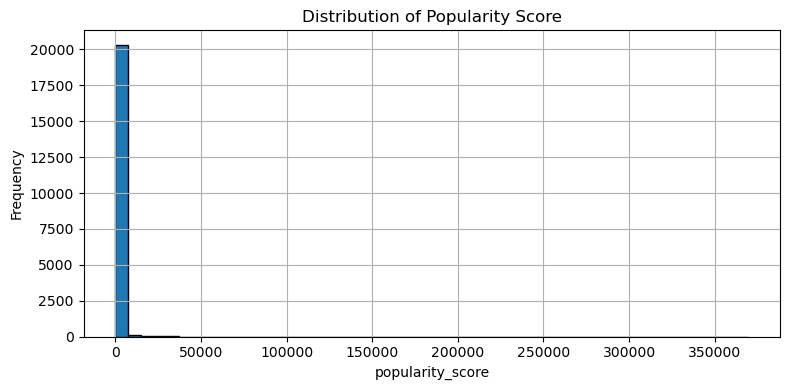

In [258]:
import matplotlib.pyplot as plt

# Plot distribution of popularity_score (ignoring NaNs)
plt.figure(figsize=(8,4))
df_final['popularity_score'].dropna().hist(bins=50, edgecolor='black')
plt.title('Distribution of Popularity Score')
plt.xlabel('popularity_score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

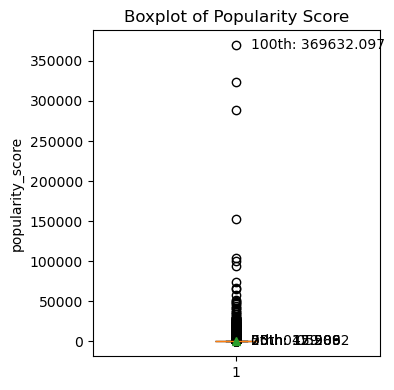

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
box = plt.boxplot(df_final['popularity_score'].dropna(), vert=True, patch_artist=True, showmeans=True)
plt.title('Boxplot of Popularity Score')
plt.ylabel('popularity_score')

# Show percentiles
percentiles = [0, 25, 50, 75, 100]
values = np.percentile(df_final['popularity_score'].dropna(), percentiles)
for p, v in zip(percentiles, values):
    plt.text(1.05, v, f'{p}th: {v:.3f}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Drop unneeded columns
columns_to_drop = ['crawl_date', 'dislike_count', 'like_count', 'upload_date', 'view_count', 'days_to_crawl',
                   'category_cc', 'join_date', 'channel', 'ts_channel', 'ts_earliest_date', 'ts_latest_date', 'ts_timeframe_days',
                   'ts_views_difference','ts_subs_difference', 'ts_videos_difference','ts_latest_subs','ts_latest_videos', 'days_on_platform',
                   'video_id', 'num_comms', 'total_comm_likes', 'total_comm_replies', 'unique_comm_authors', 'likes_per_days_to_crawl',
                   'dislikes_per_days_to_crawl', 'views_per_days_to_crawl']

df_final.drop(columns=columns_to_drop, axis=1, inplace=True)
print(df_final.shape)
df_final.head()